# **PROJECT TITLE:PREDICTING AND ANALYZING WINE QUALITY**

![Wine](Images/Wine.png)

# **BUSINESS UNDERSTANDING** 

## **PROJECT OVERVIEW**
This project focuses on analyzing a wine quality dataset to understand the relationship between various physicochemical properties and the resulting quality of red wine. The dataset includes 1,144 records and 13 attributes, such as fixed acidity, volatile acidity, citric acid, residual sugar, pH, alcohol content, and the quality rating.

By exploring and modeling this data, the goal is to gain insights into which chemical properties most strongly influence wine quality and to build a predictive model that can classify or score the quality of wine based on those properties. This type of analysis is valuable for wine producers and quality control teams aiming to improve product consistency and consumer satisfaction.



## **PROBLEM STATEMENT**
Wine quality is often judged by human tasters, which can be subjective, inconsistent, and costly. With increasing demand for quality control in wine production, there's a need for data-driven methods to assess wine quality based on measurable chemical properties.

The challenge lies in identifying the key features that affect wine quality and developing a predictive model that can reliably classify wine quality based on those features. Without such tools, producers risk inconsistent products and inefficient quality evaluation processes.

## **OBJECTIVES**
1. To explore and visualize the distribution and relationships between the physicochemical features of red wine.

2. To identify the most influential chemical properties that correlate with wine quality.

3. To preprocess the dataset, handling any missing values, outliers, or scaling issues.

4. To build and evaluate a machine learning model that can predict the quality of red wine based on its chemical features.

5. To provide actionable insights that can help wine manufacturers enhance quality control processes.

In [37]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **1. DATA LOADING & EXPLORATION**
Data loading means opening and gathering all this data so we can start working with it.

Once we have the data loaded, we want to get to know it — like flipping through the Wine Dataset to understand what’s inside.

Data exploration is like looking through the data to see the, Quality, alcohol percentage, PH, Acidity and density of wine.

In [9]:
# Loading the dataset
df_Wine = pd.read_csv('Data/WineQT.csv')
df_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
# Shows the number of rows and columns in the DataFrame
df_Wine.shape

(1143, 13)

In [11]:
# Get an overview of the df_Wine DataFrame
df_Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
# Summary statistics of the DataFrame
df_Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
# Checking for missing for missing values
df_Wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There are no missing values.

In [14]:
# Checking for duplicates
df_Wine.duplicated().sum()

0

There are no duplicates.

In [15]:
# Save the file as an Excel file
# df_Wine.to_excel('Data/WineQT.xlsx' , index=False)

## **2.EDA (DATA ANALYSIS) & DATA VISUALIZATION**
EDA is like getting to know my data — it’s the first step where i carefully examined the dataset to understand its main characteristics.

Data Visualization is the process of creating charts, graphs, and maps that turn numbers and data into pictures.

### **1. UNIVARIATE ANALYSIS**
#### Checking for distribution of the data and visualizing it.

#### Univariate analysis is the simplest form of data analysis — it examines just one variable at a time.

#### Purpose: To understand the distribution, central tendency (mean, median), and spread (range, standard deviation) of a single variable.

#### Examples include: Bar Graphs, Histogram, Box Plot, Pie Chart

#### **1. Histograms for all numeric features**

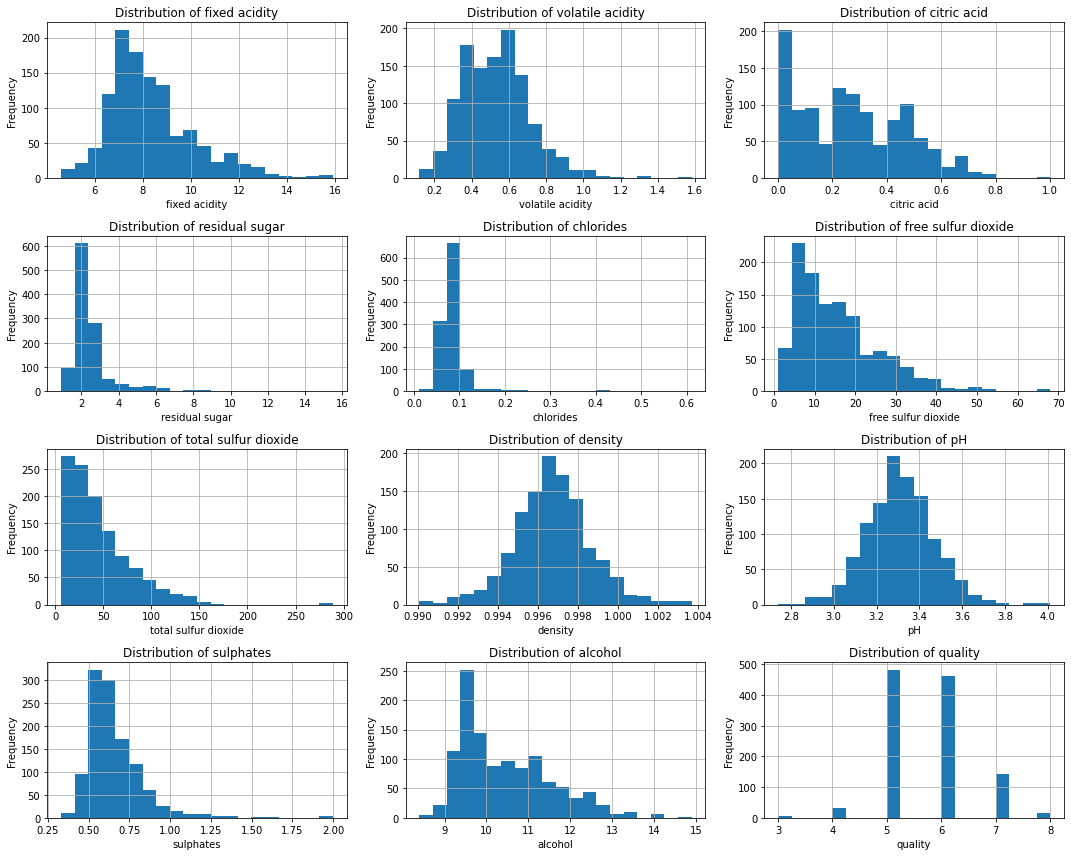

In [22]:
numeric_features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i + 1) 
    df_Wine[feature].hist(bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### **2.Countplot for Distribution of Wine Quality Ratings**

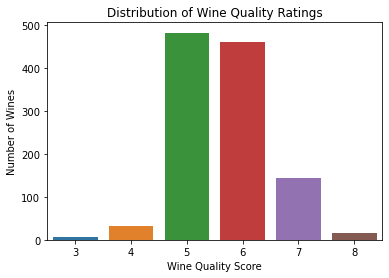

In [19]:
sns.countplot(x='quality', data=df_Wine)
plt.title('Distribution of Wine Quality Ratings')     
plt.xlabel('Wine Quality Score')                        
plt.ylabel('Number of Wines')                           
plt.show()


### **2. BIVARIATE ANALYSIS**
#### Checking for correlations; multiple Xs and Y

#### Bivariate analysis explores the relationship between two variables.

#### Purpose: To identify whether and how the variables are related — for example, does one increase when the other does?

#### Examples include: Heatmaps, Line Graphs,Bar Plot, Scatter Plot .

#### **1. Scatter Plots to Visualize relationships between two continuous variables**

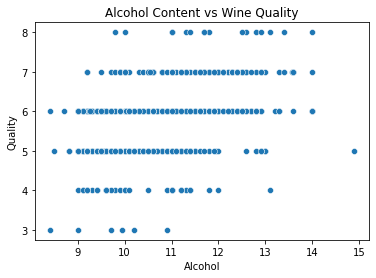

In [24]:
sns.scatterplot(x='alcohol', y='quality', data=df_Wine)
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()


#### **2.Boxplots (Categorical vs Numeric) to Compare the distribution of a numeric variable across different categories**

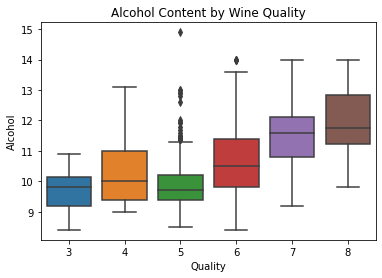

In [25]:
sns.boxplot(x='quality', y='alcohol', data=df_Wine)
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()


#### **3. Correlation Heatmap to Show pairwise correlation coefficients between numeric features**

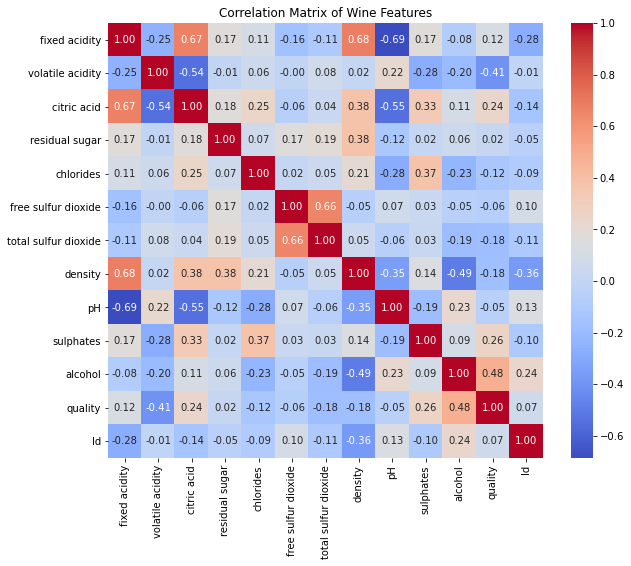

In [26]:
corr = df_Wine.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Wine Features')
plt.show()


# **3. DATA MODELLING**
Data modeling is the process of using statistical, mathematical, or machine learning models to understand relationships in data and make predictions or inferences.

In [32]:
# Optional: Simplify the quality into categories (e.g., low, medium, high)
def quality_label(value):
    if value <= 5:
        return 'low'
    elif value == 6:
        return 'medium'
    else:
        return 'high'

df_Wine['quality_label'] = df_Wine['quality'].apply(quality_label)


In [ ]:
X = df_Wine.drop(['quality', 'quality_label'], axis=1)
y = df_Wine['quality_label']  # or use df_Wine['quality'] directly if not labeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.7074235807860262
              precision    recall  f1-score   support

        high       0.69      0.71      0.70        28
         low       0.73      0.79      0.76       102
      medium       0.69      0.62      0.65        99

    accuracy                           0.71       229
   macro avg       0.70      0.71      0.70       229
weighted avg       0.71      0.71      0.71       229



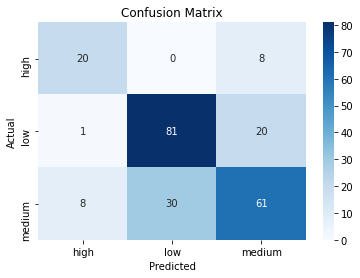

In [38]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-Score
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()